[4.010300180935344, 3.421904851924104, 1.0932693641724387, 264.03042379884374, 1061.2786032564063, 2139.3295349860136, 3254.2734606881936, 4262.823999817518, 5113.374894001363, 5806.208808166317, 6362.400353039358, 6807.459190760994, 7164.674484972871, 8595.45734331288, 8922.097544047083, 9041.922729402495, 9098.372127969418, 9129.295458125971, 9148.027759785165, 9160.219703885172, 9168.593477004986, 9174.59045701662, 9193.802585194526, 9197.365634510767, 9198.612900795235, 9199.190210888093, 9199.503804488997, 9199.692887008621, 9199.815604887544, 9199.89973831964, 9199.95991726834]


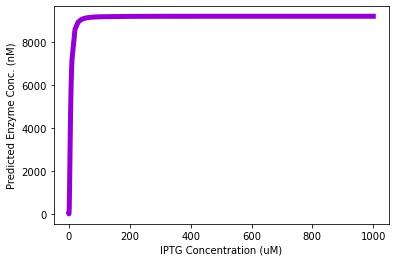

In [506]:
import numpy as np
from scipy.integrate import odeint

k_pLacI = 15 #[LINK:https://reader.elsevier.com/reader/sd/pii/S0006349508001008?token=232AC13078F3BE63479AF843B8CE6A3505F6034ED996D7EA499FF0D864FFE79816FC34904D3C2C329CE2343A18D66313&originRegion=eu-west-1&originCreation=20210713092353 ]
k_pmRNA = 0.23 #[LINK:https://reader.elsevier.com/reader/sd/pii/S0006349508001008?token=232AC13078F3BE63479AF843B8CE6A3505F6034ED996D7EA499FF0D864FFE79816FC34904D3C2C329CE2343A18D66313&originRegion=eu-west-1&originCreation=20210713092353]
k_dmRNA = 0.462 #[LINK:https://reader.elsevier.com/reader/sd/pii/S0006349508001008?token=232AC13078F3BE63479AF843B8CE6A3505F6034ED996D7EA499FF0D864FFE79816FC34904D3C2C329CE2343A18D66313&originRegion=eu-west-1&originCreation=20210713092353]
k_dc = 12 #[LINK:https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2772868/#:~:text=The%20IPTG%20association%20rate%20constant,Figure%205%3B%20Table%203.]
k_dLacI =  0.2 #[LINK:https://reader.elsevier.com/reader/sd/pii/S0006349508001008?token=232AC13078F3BE63479AF843B8CE6A3505F6034ED996D7EA499FF0D864FFE79816FC34904D3C2C329CE2343A18D66313&originRegion=eu-west-1&originCreation=20210713092353]
k_pc = 0.12 #[LINK: https://2020.igem.org/Team:ZJU-China/Model#references]
k_pRP = 6.116 #[LINK: https://2020.igem.org/Team:ZJU-China/Model#references]
k_dRP =0.462 #[LINK: Jayapal, K.P., Sui, S., Philp, R.J., Kok, Y.J., Yap, M.G., Griffin, T.J., and Hu, W.S. (2010) Multitagging proteomic strategy to estimate protein turnover rates in dynamic systems. J Proteome Res 9: 2087–2097. pp.2094-2095 table 1PubMed ID20184388]
k_PMRNAP = 0.5 #[LINK: https://2020.igem.org/Team:ZJU-China/Model#references]
k_dep1 = 0.2 #[LINK: Hammar P et al. The lac repressor displays facilitated diffusion in living cells. Science. 2012 June 22 336(6088):1595-1598. doi:10.1126/science.1221648 p.1596 left column top paragraphPubMed ID22723426]
k_DMRNAP = 0.462 #[LINK:Comparison of Deterministic and Stochastic Models of the lac Operon Genetic Network - lMichailStamatakisNikos V.Mantzaris]
k_b = 0.22 #[LINK: https://www.pnas.org/content/110/24/9740]
k_dep2 = 0.2 #[LINK: Hammar P et al. The lac repressor displays facilitated diffusion in living cells. Science. 2012 June 22 336(6088):1595-1598. doi:10.1126/science.1221648 p.1596 left column top paragraphPubMed ID22723426]
k_ub = 28.8 #[LINK: https://www.pnas.org/content/110/24/9740]
k_p = 10 #[Determined from Protein vs Time Model]
k_l = 0.01
k_d = 0.462 #[LINK:Comparison of Deterministic and Stochastic Models of the lac Operon Genetic Network - lMichailStamatakisNikos V.Mantzaris]
k_df = 0.2 #[LINK:Comparison of Deterministic and Stochastic Models of the lac Operon Genetic Network - lMichailStamatakisNikos V.Mantzaris]
k_1 = 85 #[Determined from Protein vs Time Model]
k_m = 100 #[LINK:https://pubmed.ncbi.nlm.nih.gov/3300768/]]

# INITIAL CONDITIONS
#d1 = mRNA of LacI   =    20 nM                 
#d2 = LacI = 10
#d3 = (LacI - IPTG) complex = 0
#d4 = Free LacI = 0
#d5 = mRNA of RNA polymerase = 20
#d6 = RNA polymerase = 830
#d7 = RNA polymerase binding to promoter = 0
#d8 = mRNA of desired gene = 0
#d9 = desired gene = 0


tf = 1000
dt=0.01
t = np.arange(0,tf,dt)

x = [0,10,100,1000,2*10**3,3*10**3,4*10**3,5*10**3,6*10**3,7*10**3,8*10**3,9*10**3,10**4,2*10**4,3*10**4,4*10**4,5*10**4,6*10**4,7*10**4,8*10**4,9*10**4,10**5,2*10**5,3*10**5,4*10**5,5*10**5,6*10**5,7*10**5,8*10**5,9*10**5,10**6]#,2*10**6,4*10**6,6*10**6,8*10**6,10**7]#,2*10**7,4*10**7,6*10**7,8*10**7,10**8]
y =[]
for i in x:
    
    def dD(D,tm):
        
        Da,Db,Dc,Dd,De,Df,Dg,Dh,Di = D
        d1 = k_pmRNA - k_dmRNA*Da
        d2 = k_pLacI*Da - k_dLacI*Db 
        d3 = k_pc*Db*i - k_dc*Dc
        d4=  - (k_pc*Db*i - k_dc*Dc) +(k_pLacI*Da - k_dLacI*Db)
        d5 = k_PMRNAP - k_DMRNAP*De - k_dep1*Dd
        d6 = k_pRP*De - k_dRP*Df
        d7 = k_b*Df - k_ub*Dg - k_dep2*Dd
        d8 = k_l + k_1*Dg**2/(k_m**2 + Dg**2) - k_d*Dh
        d9 = k_p*Dh - k_df*Di
        return[d1,d2,d3,d4,d5,d6,d7,d8,d9]
    D = odeint(dD,[0,0,0,0,0,0,0,0,0],t)
    Da=D[:,0]
    Db=D[:,1]
    Dc=D[:,2]
    Dd=D[:,3]
    De=D[:,4]
    Df=D[:,5]
    Dg=D[:,6]
    Dh=D[:,7]
    Di= D[:,8]
    
    from scipy.signal import find_peaks
    #plt.plot(t,Di,linewidth = 5,color = 'm')
    #plt.xlabel('Time(min)')
    #plt.ylabel('Enzyme conc. (nM)')
    #print(Da)
    #print(Db)
    #print(Dc)
    #print(Dd)
    #print(De)
    #print(Df)
    #print(Dg)
    #print(Dh)
    #print(Di)
    from scipy.signal import find_peaks
    peaks = find_peaks(Di,height = 1)
    #print(peaks)
    #height = peaks[1]['peak_heights']
    #m = np.max(height)
    #print(m)
    y.append(Di[99999])
    #print(height)
x1= [o/10**3 for o in x]    
plt.plot(x1,y,linewidth = 5,color = 'darkviolet')
plt.xlabel('IPTG Concentration (uM)')
plt.ylabel('Predicted Enzyme Conc. (nM)')
print(y)